In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


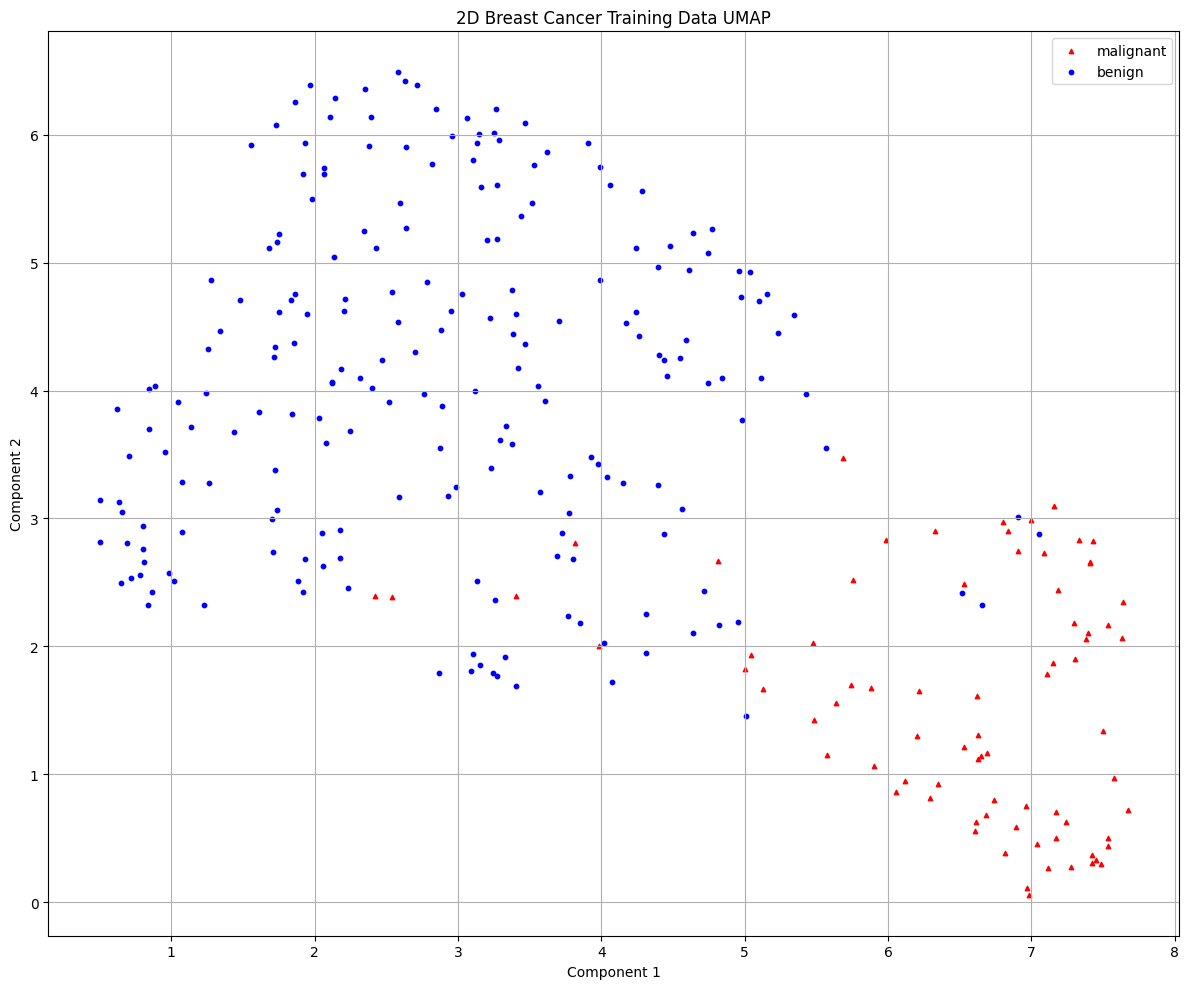

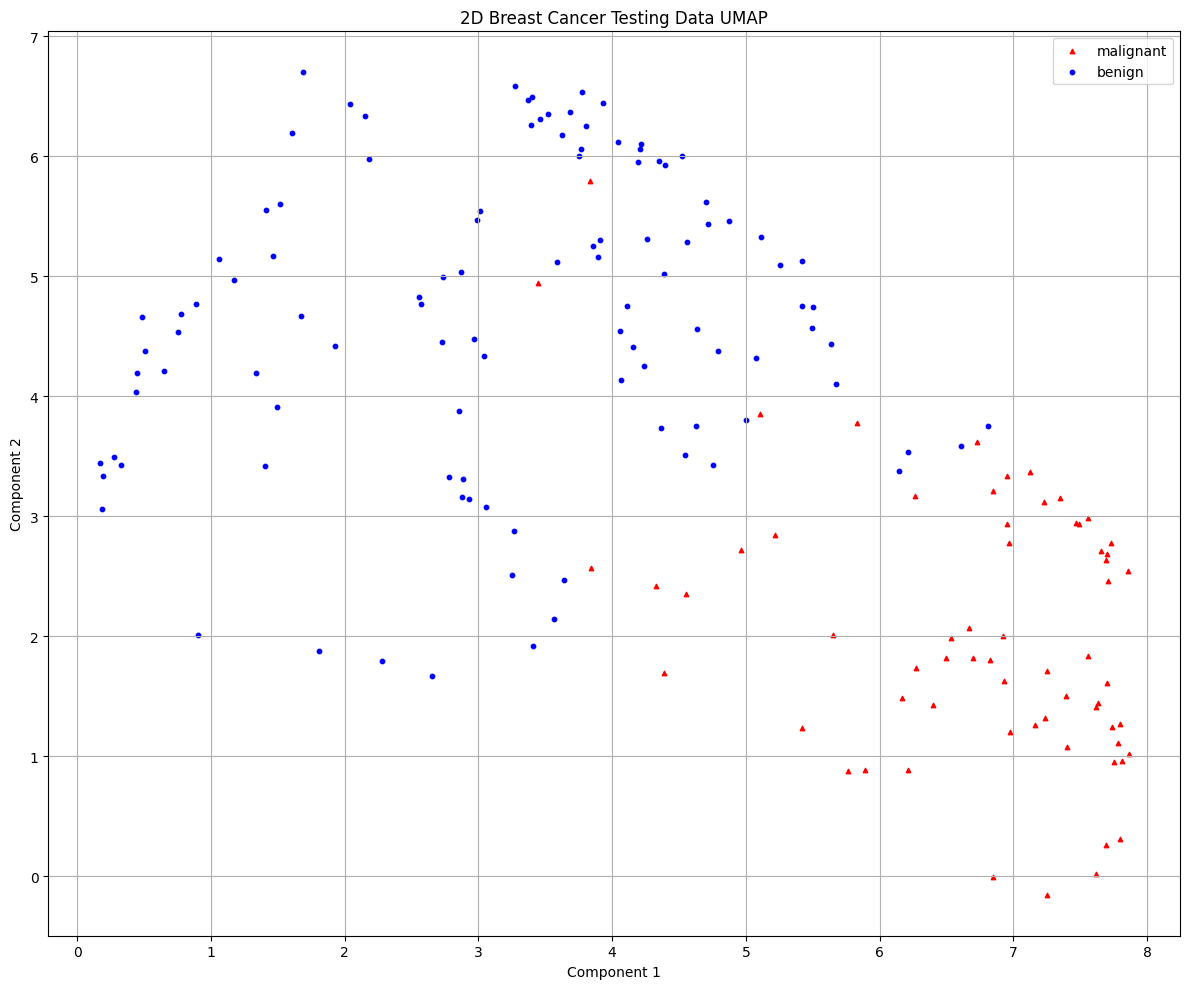

[I 2025-04-27 11:18:52,488] A new study created in memory with name: no-name-29f1f188-0064-48c4-a673-6b47f5f6aec5
[I 2025-04-27 11:18:52,505] Trial 0 finished with value: 0.7307924984875983 and parameters: {'C': 0.007248463318034717, 'kernel': 'sigmoid', 'gamma': 0.0004727311722402843, 'max_iter': 9714}. Best is trial 0 with value: 0.7307924984875983.
[I 2025-04-27 11:18:52,523] Trial 1 finished with value: 0.9510586811857229 and parameters: {'C': 0.3451426911986224, 'kernel': 'rbf', 'gamma': 0.0050912431699537625, 'max_iter': 4311}. Best is trial 1 with value: 0.9510586811857229.
[I 2025-04-27 11:18:52,539] Trial 2 finished with value: 0.7307924984875983 and parameters: {'C': 1.184040830339937, 'kernel': 'sigmoid', 'gamma': 0.0008058429158453094, 'max_iter': 9254}. Best is trial 1 with value: 0.9510586811857229.
[I 2025-04-27 11:18:52,556] Trial 3 finished with value: 0.947610405323654 and parameters: {'C': 10.135984279039471, 'kernel': 'rbf', 'gamma': 0.6812480907749724, 'max_iter': 

Best trial:
Accuracy: 0.9581972171808832
Best hyperparameters:  {'C': 11.546009570611236, 'kernel': 'linear', 'max_iter': 2113}


/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2113).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2113).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2113).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2113).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python

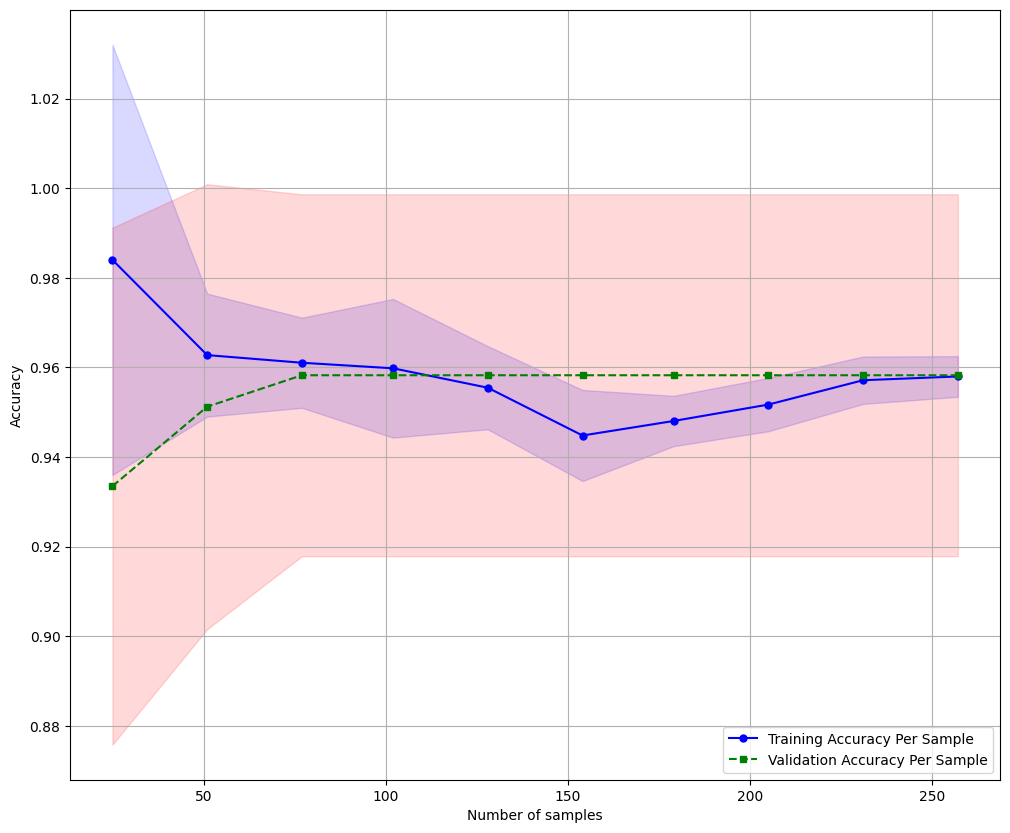

Confusion Matrix
[[ 54  10]
 [  3 104]]
Accuracy: 0.9240, Precision: 0.9123, Recall: 0.9720, F1: 0.9412, AUC: 0.9777


/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2113).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)